# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 22     |  |
| :-------------|:-------------|
| Student Tom Jongbloed| 6581048 |
| Student Eline Deiters| 6283136 |
| Student Yu He Zhang| 6455417 |

| Planning Groep: 22     |10:45 - 17:45 |
|---|---|
| Mijlpaal 1: Criteria opgesteld | 12:00 |
| Mijlpaal 2: Eerste kalibratie meting gedaan| 13:45 |
| Pauze 1| 12:45 - 13:45 |
| Pauze 2| 15:45 - 16:15 |

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](schetsenEline.JPG "analyse: ideeen")
![Alt](schetsenYu.JPG "analyse: ideeen")
![Alt](schetsenTom.JPG "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.



| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|Force Sensor | Weegschaal | De weegschaal moet  1 gram nauwkeurig kunnen meten en een weegcapaciteit van een range van 0 tot 5000 gram. |
|Thermistor | Waterkoker | De sensor moet een signaal geven wanneer de drempelwaarde van 100 graden celcius is bereikt. Verder moet de sensor temperaturen van een range tussen de 90 en 110 graden. De waterkoker moet automatisch uitgaan bij een temperatuur van 100 graden celsius. Daarbij zit een nauwkeurigheid van +/- 4 graden celsius. |
|LDR | Automatische straatverlichting | De lantaarnpalen moeten bij een lux van boven de 500 automatisch uitgaan en als hij eronder komt weer aan. Bij een woonstraat moet de lichtsterkte van de lantaarnpaal minimaal 10-20 Lux zijn. |



Groep 22 heeft gekozen voor sensor LDR. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
In de foto is de schakeling op het breadboard en de arduino te zien die nodig is voor de meetopstelling waarmee de LDR wordt gebruikt als sensor bij automatische 'straatverlichting'.
 ![Alt](Schetsopstelling.JPG "schets student")

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? 
Wij gaan de lichsterkte aanpassen          
2. Over welk bereik ga je deze variabelen veranderen?
0 (helemaal geen licht) tot 15000 lux (zaklamp van een iphone)
3. Wat ga je allemaal meten?
De lichtsterkte van geen licht (in een kast), vinger op de LDR,  klaslokaal licht, daglicht en van de zaklamp.
4. Hoeveel metingen ga je doen?
Van elke lichtsterkte doen we er één via pyphox en 10 van arduino. 
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen?
Ja, met deze keuze kan het.


## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
 ![Alt](opstellingphyphox.JPG "meetopstelling student") 
 ![Alt](opstellingdonker.JPG "meetopstelling student")
 ![Alt](opstellinglicht.JPG "meetopstelling student")

In de eerste foto is de meetopstelling te zien die gebruikt is om de lichtsterkte op de verschillende plekken te meten. Er is een lichtsensor te zien die wordt gebruikt om de lichtsterkte in Lux te meten. De arduino-opstelling is gebruikt om de lichtsterkte te vertalen in bits. In de tweede en de derde afbeelding is de opstelling te zien die straatverlichting heel simpel zou moeten nabootsen. In de tweede foto wordt de sensor in het schemerlicht onder de tafel gehouden en branden de lampen en in de derde foto wordt de opstelling in het daglicht gehouden en branden de lampjes niet.

## *Opdracht 6*: Meten en fitten, Leerdoel

In [10]:
# Zet hier jouw data in een voor jou handig formaat
import matplotlib.pyplot as plt
import numpy as np
from math import log
from scipy.optimize import curve_fit
bits_daglicht = np.array([971, 970, 971, 970, 971, 969, 971, 970, 969, 971])
bits_daglicht_average = np.mean(bits_daglicht)
bits_dark = np.array([844, 843, 842, 844, 841, 844, 843, 845, 842])
bits_dark_average = np.mean(bits_dark)
bits_daglichtD = np.array([960,962,963,961,960,964,963,962])
bits_daglichtD_average = np.mean(bits_daglichtD)
bits_onder = np.array([567,567,568,566,567,568,567])
bits_onder_average = np.mean(bits_onder)
bits_kast = np.array([14,17,15,16,17,16,17,16,17,15,14,16,17,16])
bits_kast_average = np.mean(bits_kast)
bits_licht = np.array([1020,1019,1020,1019,1019,1020,1020,1020,1020,1020])
bits_licht_average = np.mean(bits_licht)
bits_list = np.array([bits_daglicht_average, bits_dark_average, bits_daglichtD_average, bits_onder_average, bits_kast_average,bits_licht_average])
print(bits_list)
lux_list = np.array([2600,22,1870,860,0,14000])
bits_list_final = np.sort(bits_list)
lux_list_final = np.sort(lux_list)


[ 970.3         843.11111111  961.875       567.14285714   15.92857143
 1019.7       ]


The calculated value for the adge of bits should be: 827


/var/folders/yq/tp0thgjn1cjfsfqr2nphb4640000gn/T/ipykernel_25395/3322744017.py:9: RuntimeWarning: overflow encountered in power
  return a**x+b


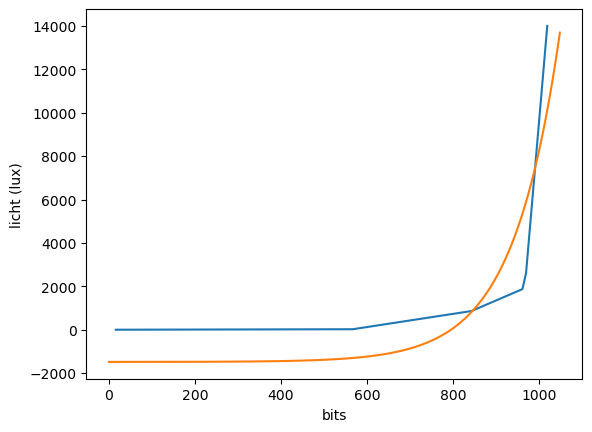

In [11]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.


plt.plot(bits_list_final, lux_list_final,)
plt.xlabel("bits")
plt.ylabel("licht (lux)")
def fit_func(x,a,b):
    return a**x+b
params, covariance = curve_fit(fit_func, bits_list_final, lux_list_final)
test_x = np.arange(0,1050,1)
test_y = params[0]**test_x + params[1]
plt.plot(test_x,test_y)

grens_lux = 500
grens_bits = log(grens_lux-params[1])/log(params[0])
grens_bits_final = round(grens_bits)
print("The calculated value for the adge of bits should be:", grens_bits_final)



## *Opdracht 7*: Iteratie nodig?

Nee, was niet van toepassing bij ons onderzoek.

## *Opdracht 8*: Conclusie, leerdoel

Op basis van de metingen is te concluderen dat een LDR goed gebruikt kan worden bij geautomatiseerde straatverlichting. Als de sensor een lichtsterkte kleiner dan of gelijk 900 bit waarneemt, zullen de lampen gaan branden anders gaan de lampen uit. Dit principe kan goed worden toegepast in alledaagse geautomatiseerde straatverlichting.

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
In de foto is de schakeling op het breadboard en de arduino te zien die nodig is voor de meetopstelling waarmee de LDR wordt gebruikt als sensor bij automatische 'straatverlichting'.
 ![Alt](Schetsopstelling.JPG "schets student")
 ![Alt](opstellingphyphox.JPG "meetopstelling student") 
 ![Alt](opstellingdonker.JPG "meetopstelling student")
 ![Alt](opstellinglicht.JPG "meetopstelling student")

In de eerste foto is de meetopstelling te zien die gebruikt is om de lichtsterkte op de verschillende plekken te meten. Er is een lichtsensor te zien die wordt gebruikt om de lichtsterkte in Lux te meten. De arduino-opstelling is gebruikt om de lichtsterkte te vertalen in bits. In de tweede en de derde afbeelding is de opstelling te zien die straatverlichting heel simpel zou moeten nabootsen. In de tweede foto wordt de sensor in het schemerlicht onder de tafel gehouden en branden de lampen en in de derde foto wordt de opstelling in het daglicht gehouden en branden de lampjes niet.




### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.


| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|Force Sensor | Weegschaal | De weegschaal moet  1 gram nauwkeurig kunnen meten en een weegcapaciteit van een range van 0 tot 5000 gram. |
|Thermistor | Waterkoker | De sensor moet een signaal geven wanneer de drempelwaarde van 100 graden celcius is bereikt. Verder moet de sensor temperaturen van een range tussen de 90 en 110 graden. De waterkoker moet automatisch uitgaan bij een temperatuur van 100 graden celsius. Daarbij zit een nauwkeurigheid van +/- 4 graden celsius. |
|LDR | Automatische straatverlichting | De lantaarnpalen moeten bij een lux van boven de 500 automatisch uitgaan en als hij eronder komt weer aan. Bij een woonstraat moet de lichtsterkte van de lantaarnpaal minimaal 10-20 Lux zijn. |



Groep 22 heeft gekozen voor sensor LDR. 

### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

[ 970.3         843.11111111  961.875       567.14285714   15.92857143
 1019.7       ]
The calculated value for the adge of bits should be: 827


/var/folders/yq/tp0thgjn1cjfsfqr2nphb4640000gn/T/ipykernel_25395/3590798146.py:31: RuntimeWarning: overflow encountered in power
  return a**x+b


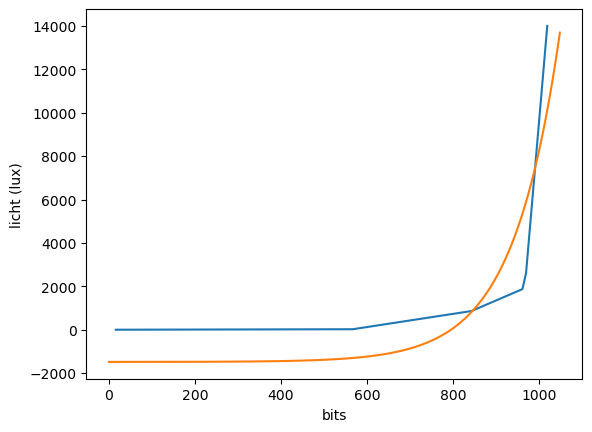

In [12]:
# Zet hier jouw data in een voor jou handig formaat
import matplotlib.pyplot as plt
import numpy as np
from math import log
from scipy.optimize import curve_fit
bits_daglicht = np.array([971, 970, 971, 970, 971, 969, 971, 970, 969, 971])
bits_daglicht_average = np.mean(bits_daglicht)
bits_dark = np.array([844, 843, 842, 844, 841, 844, 843, 845, 842])
bits_dark_average = np.mean(bits_dark)
bits_daglichtD = np.array([960,962,963,961,960,964,963,962])
bits_daglichtD_average = np.mean(bits_daglichtD)
bits_onder = np.array([567,567,568,566,567,568,567])
bits_onder_average = np.mean(bits_onder)
bits_kast = np.array([14,17,15,16,17,16,17,16,17,15,14,16,17,16])
bits_kast_average = np.mean(bits_kast)
bits_licht = np.array([1020,1019,1020,1019,1019,1020,1020,1020,1020,1020])
bits_licht_average = np.mean(bits_licht)
bits_list = np.array([bits_daglicht_average, bits_dark_average, bits_daglichtD_average, bits_onder_average, bits_kast_average,bits_licht_average])
print(bits_list)
lux_list = np.array([2600,22,1870,860,0,14000])
bits_list_final = np.sort(bits_list)
lux_list_final = np.sort(lux_list)
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.


plt.plot(bits_list_final, lux_list_final,)
plt.xlabel("bits")
plt.ylabel("licht (lux)")
def fit_func(x,a,b):
    return a**x+b
params, covariance = curve_fit(fit_func, bits_list_final, lux_list_final)
test_x = np.arange(0,1050,1)
test_y = params[0]**test_x + params[1]
plt.plot(test_x,test_y)

grens_lux = 500
grens_bits = log(grens_lux-params[1])/log(params[0])
grens_bits_final = round(grens_bits)
print("The calculated value for the adge of bits should be:", grens_bits_final)


## *Opdracht 8*: Conclusie, leerdoel

Op basis van de metingen is te concluderen dat een LDR goed gebruikt kan worden bij geautomatiseerde straatverlichting. Als de sensor een lichtsterkte kleiner dan of gelijk 900 bit waarneemt, zullen de lampen gaan branden anders gaan de lampen uit. Dit principe kan goed worden toegepast in alledaagse geautomatiseerde straatverlichting.